In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('Advertising.csv',usecols=["TV","Radio","Newspaper","Sales"])

In [11]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


In [12]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


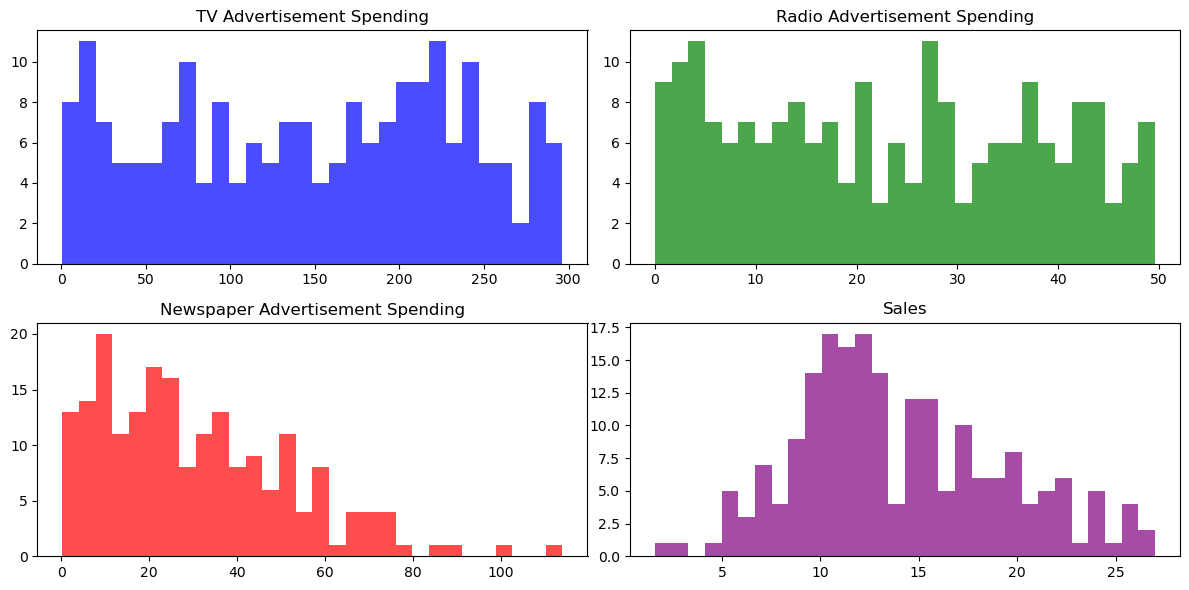

In [14]:
# Plot histograms for numerical features
plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.hist(data['TV'], bins=30, color='blue', alpha=0.7)
plt.title('TV Advertisement Spending')

plt.subplot(222)
plt.hist(data['Radio'], bins=30, color='green', alpha=0.7)
plt.title('Radio Advertisement Spending')

plt.subplot(223)
plt.hist(data['Newspaper'], bins=30, color='red', alpha=0.7)
plt.title('Newspaper Advertisement Spending')

plt.subplot(224)
plt.hist(data['Sales'], bins=30, color='purple', alpha=0.7)
plt.title('Sales')

plt.tight_layout()
plt.show()

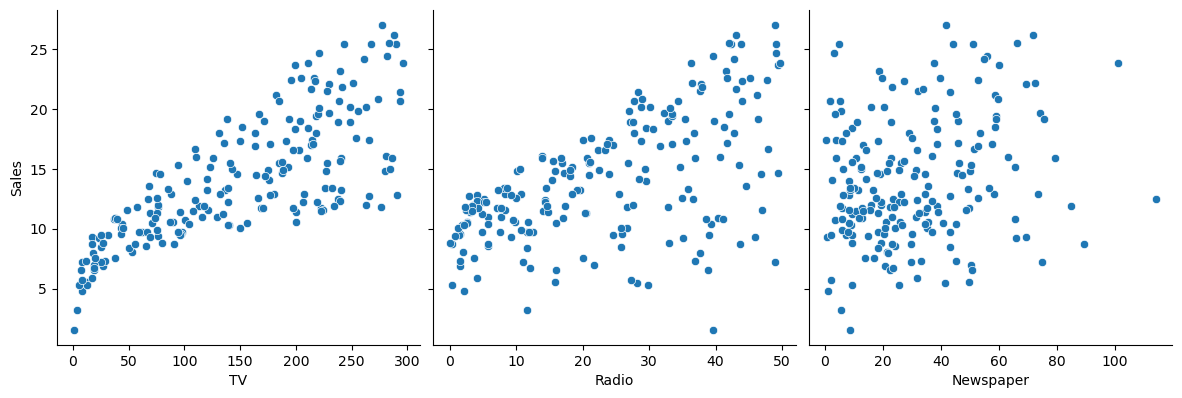

In [15]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4)
plt.show()

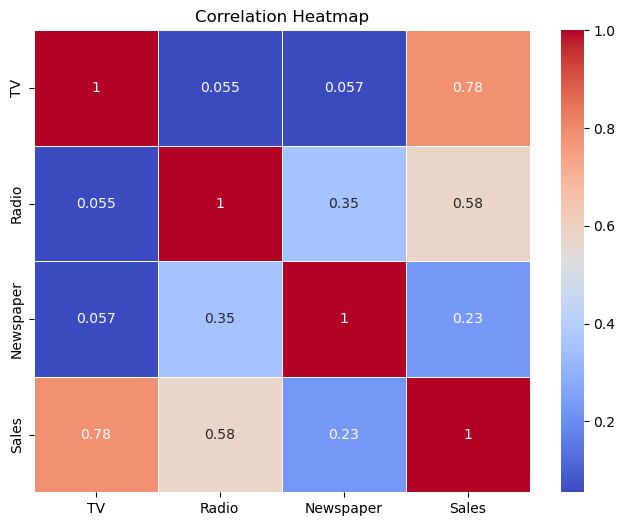

In [16]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

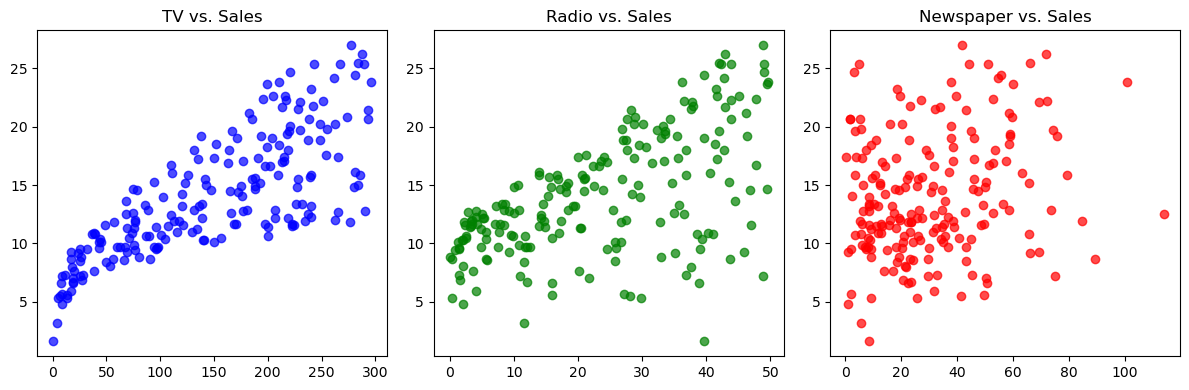

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(data['TV'], data['Sales'], color='blue', alpha=0.7)
plt.title('TV vs. Sales')

plt.subplot(132)
plt.scatter(data['Radio'], data['Sales'], color='green', alpha=0.7)
plt.title('Radio vs. Sales')

plt.subplot(133)
plt.scatter(data['Newspaper'], data['Sales'], color='red', alpha=0.7)
plt.title('Newspaper vs. Sales')

plt.tight_layout()
plt.show()

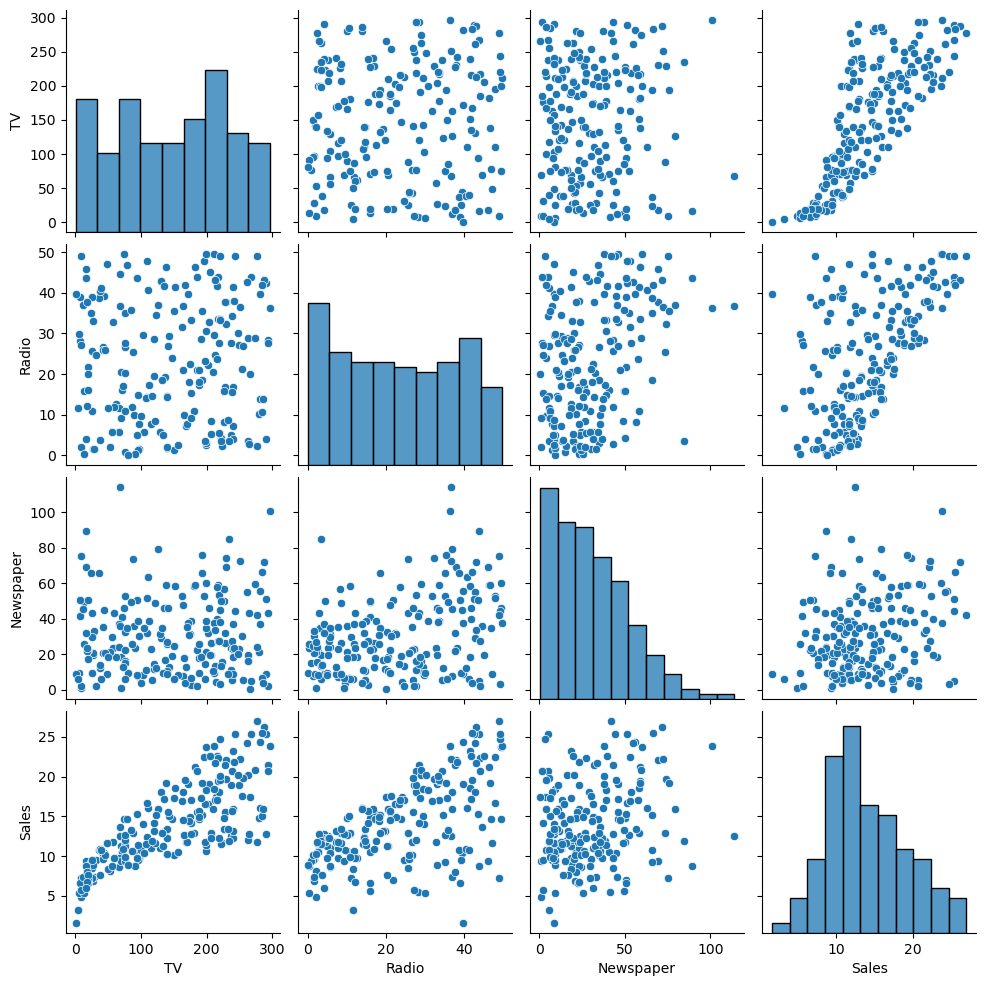

In [22]:
sns.pairplot(data, height=2.5)
plt.show()

In [27]:
# Split the data into training and testing sets
X = data.drop('Sales', axis=1)  # Features
y = data['Sales']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error: 1.46
Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
R-squared (R2): 0.90


In [ ]:
# Use the trained model for sales prediction with new data
new_data = pd.DataFrame({'Feature1': [value1], 'Feature2': [value2], ...})
predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]:.2f}')

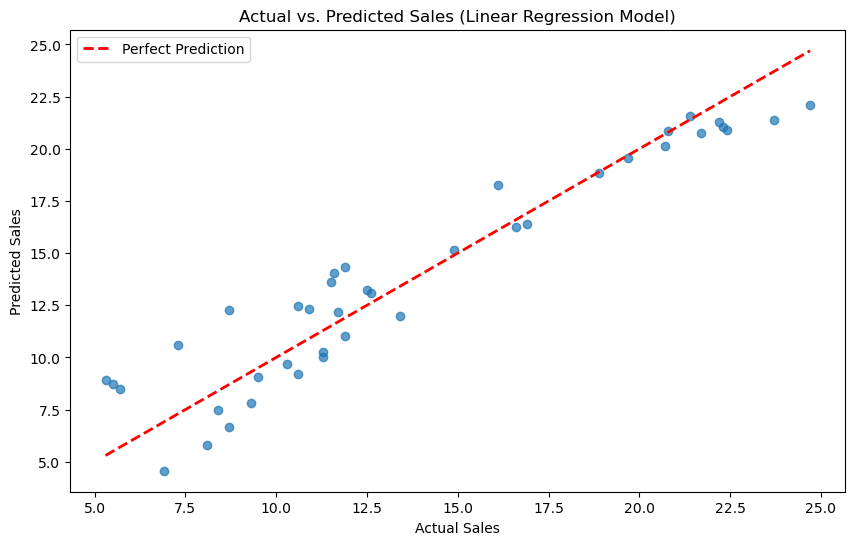

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Linear Regression Model)')

# Add a line representing a perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [36]:
# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error: 0.62
Mean Squared Error: 0.59
Root Mean Squared Error: 0.77
R-squared (R2): 0.98


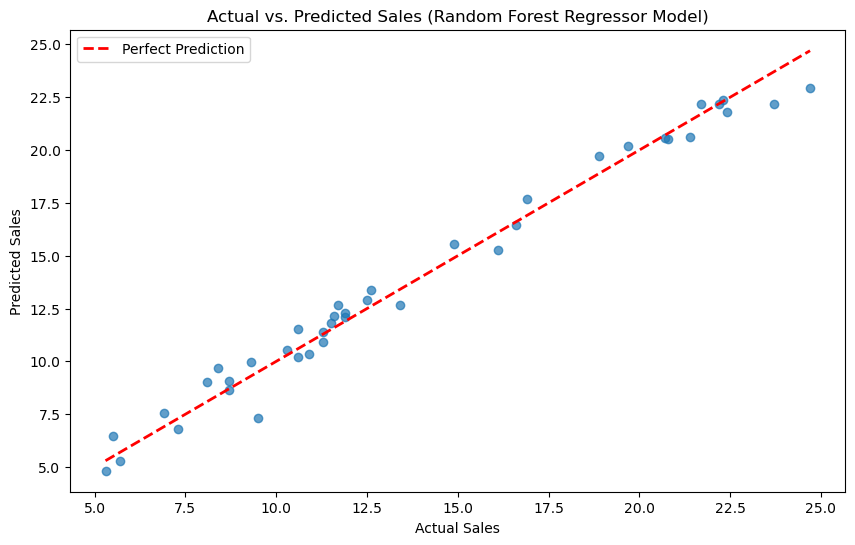

In [37]:
# Create a scatter plot of actual vs. predicted sales values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Random Forest Regressor Model)')

# Add a line representing a perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# Add legend
plt.legend()

# Show the plot
plt.show()